# Big Data Sales Report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error,classification_report
from sklearn.model_selection import cross_val_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 Two CSV files — Train and Test has been given.

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [3]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
print(' Train Data Shape: ', train_data.shape,'\n', 'Test Data Shape: ',test_data.shape)

 Train Data Shape:  (8523, 12) 
 Test Data Shape:  (5681, 11)


Making copy of TEST & TRAIN

In [6]:
train_original = train_data.copy() 
test_original = test_data.copy()

In [7]:
print(' Train Dataset information: \t\n')
train_data.info()

print('\nTest Dataset information: \n')
test_data.info()

 Train Dataset information: 	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Test Dataset 

There are 4 numeric and 7 categorical variables.

### Merging data for  Exploratory Data Analysis 

In [8]:
train_data['source'] = 'train'

test_data['Item_Outlet_Sales'] = 0

data = pd.concat([train_data, test_data], sort = False)

print(train_data.shape, test_data.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [9]:
data['Item_Outlet_Sales'].describe()


count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

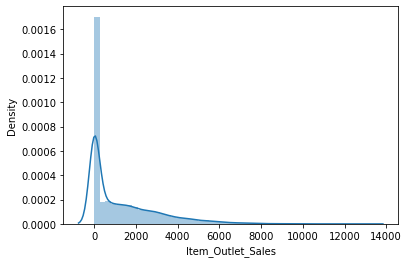

In [10]:
sns.distplot(data['Item_Outlet_Sales'])

In [11]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())

print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [12]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [13]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [14]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

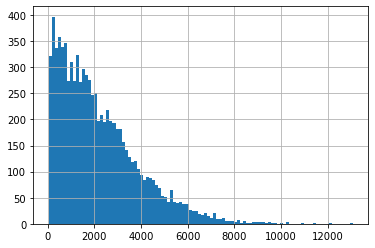

In [15]:
train_data['Item_Outlet_Sales'].hist(bins = 100);

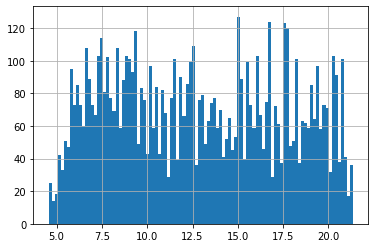

In [16]:
train_data['Item_Weight'].hist(bins = 100);

<AxesSubplot:>

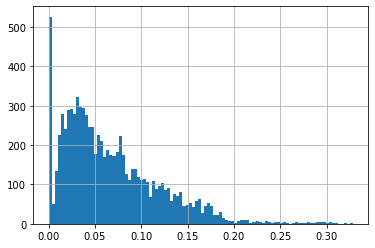

In [17]:
train_data['Item_Visibility'].hist(bins = 100)

<AxesSubplot:>

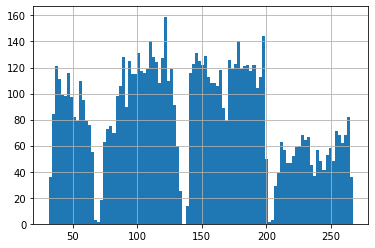

In [18]:
train_data['Item_MRP'].hist(bins = 100)

# Observations:
There seems to be no clear-cut pattern in Item_Weight. 
Item_Visibility is right-skewed and should be transformed to curb its skewness. 
We can clearly see 4 different distributions for Item_MRP.

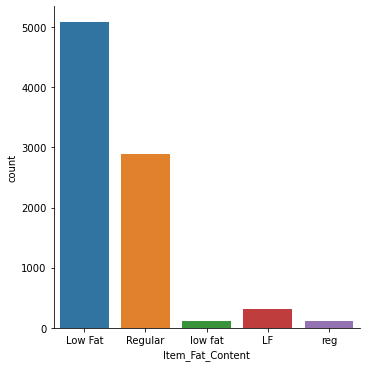

In [19]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train_data)

In [20]:
train_data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

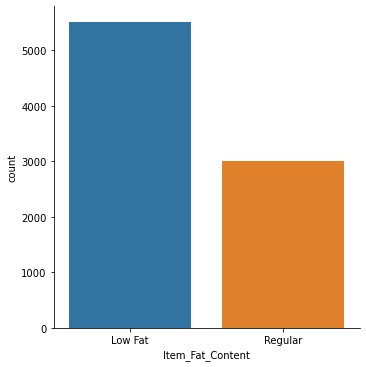

In [21]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train_data)

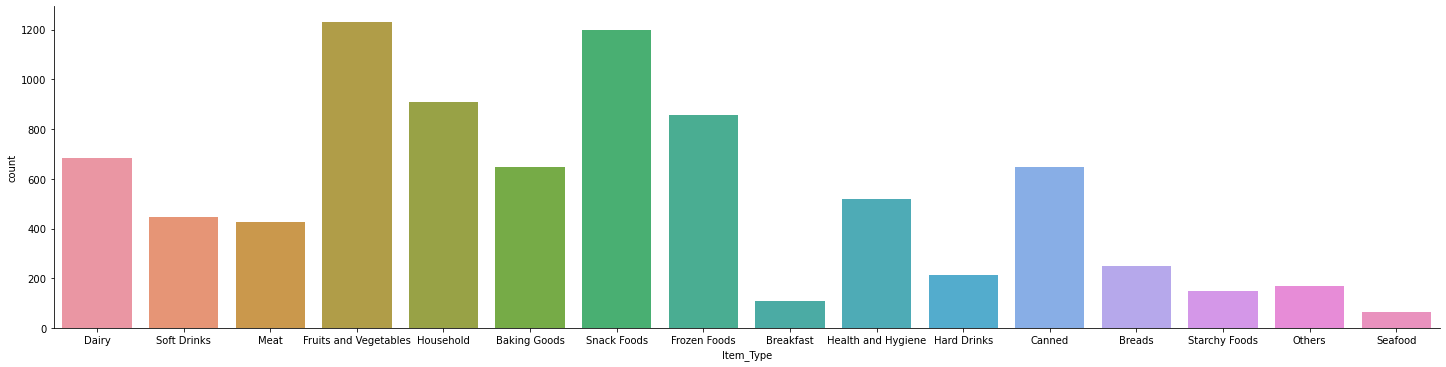

In [22]:
sns.catplot('Item_Type',kind = 'count',data = train_data,aspect =4)

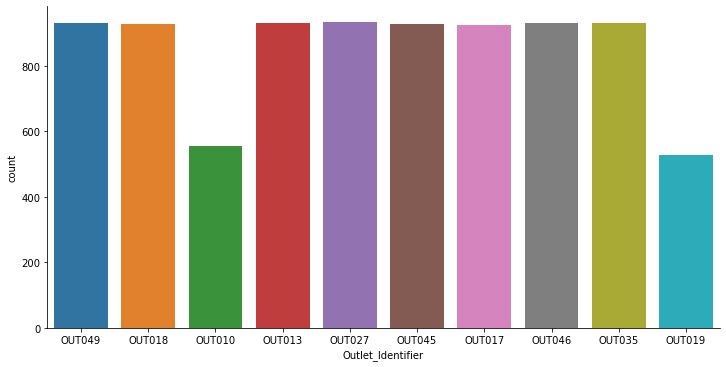

In [23]:
sns.catplot('Outlet_Identifier',kind = 'count',data = train_data,aspect = 2)

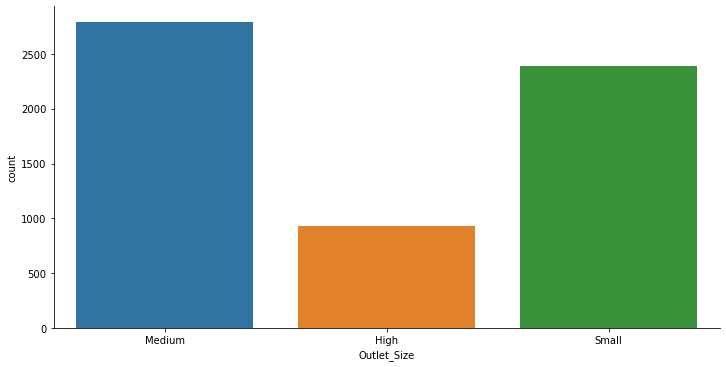

In [24]:
sns.catplot('Outlet_Size',kind = 'count',data = train_data,aspect = 2)

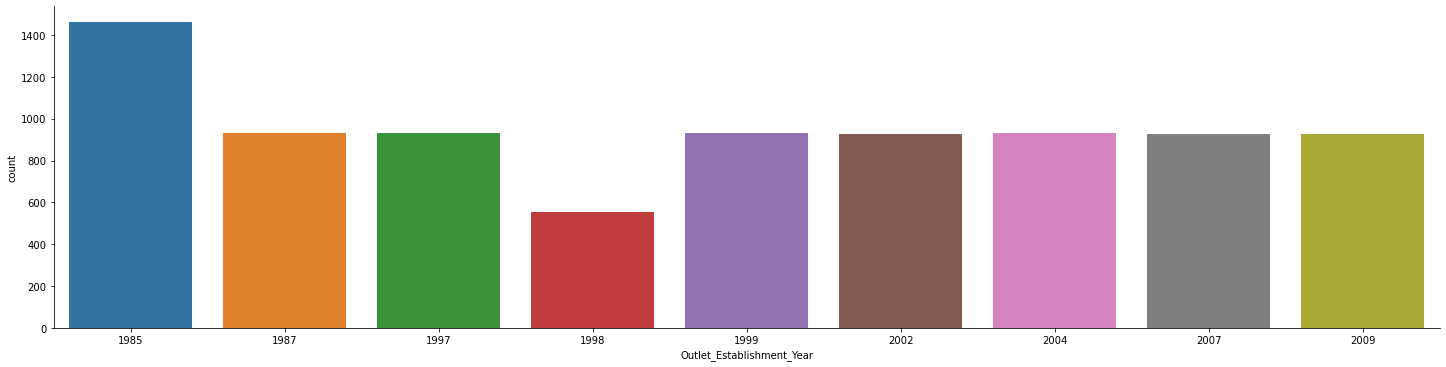

In [25]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train_data,aspect =4)

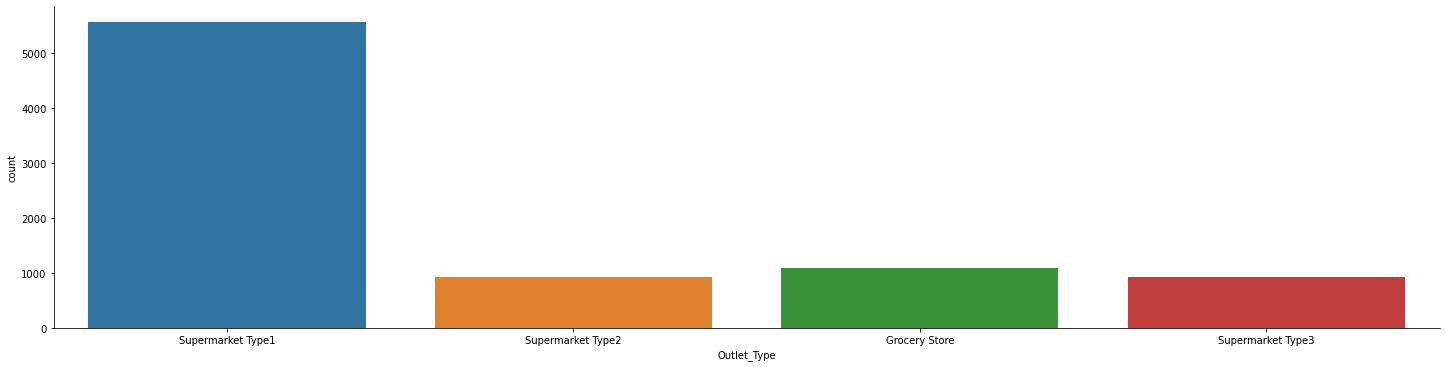

In [26]:
sns.catplot('Outlet_Type',kind = 'count',data = train_data,aspect =4)

# Observations:
Less number of observations in the data for the outlets established in the year 1998 as compared to the other years. Supermarket Type 1 seems to be the most popular category of Outlet_Type.

# Target Variable vs Independent Numerical Variable

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

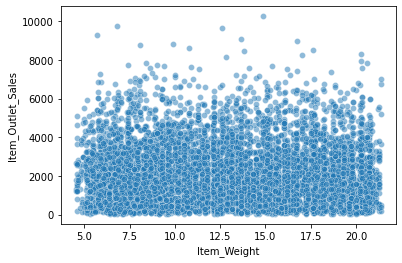

In [27]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train_data,alpha = 0.5)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

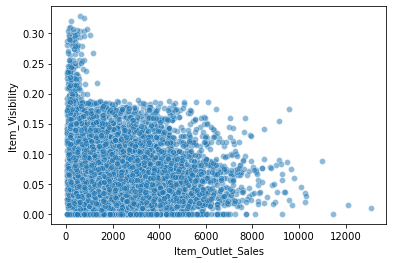

In [28]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train_data,alpha = 0.5)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

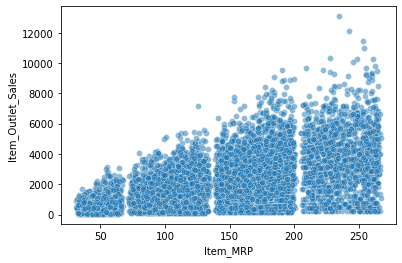

In [29]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train_data,alpha = 0.5)

# Target Variable vs Independent Categorical Variables

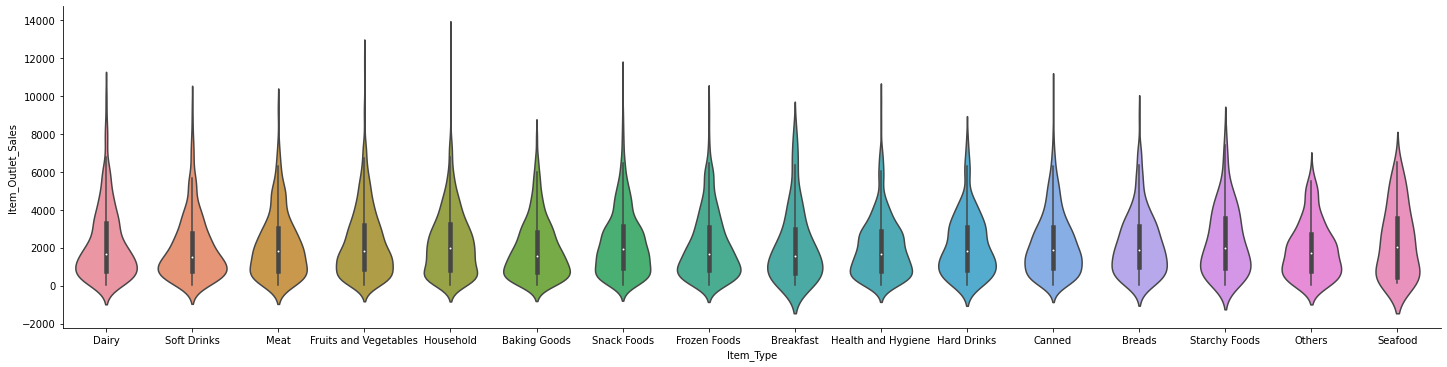

In [30]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train_data,aspect=4)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

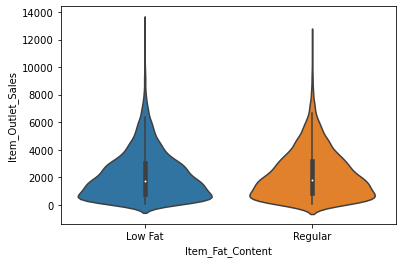

In [32]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train_data)

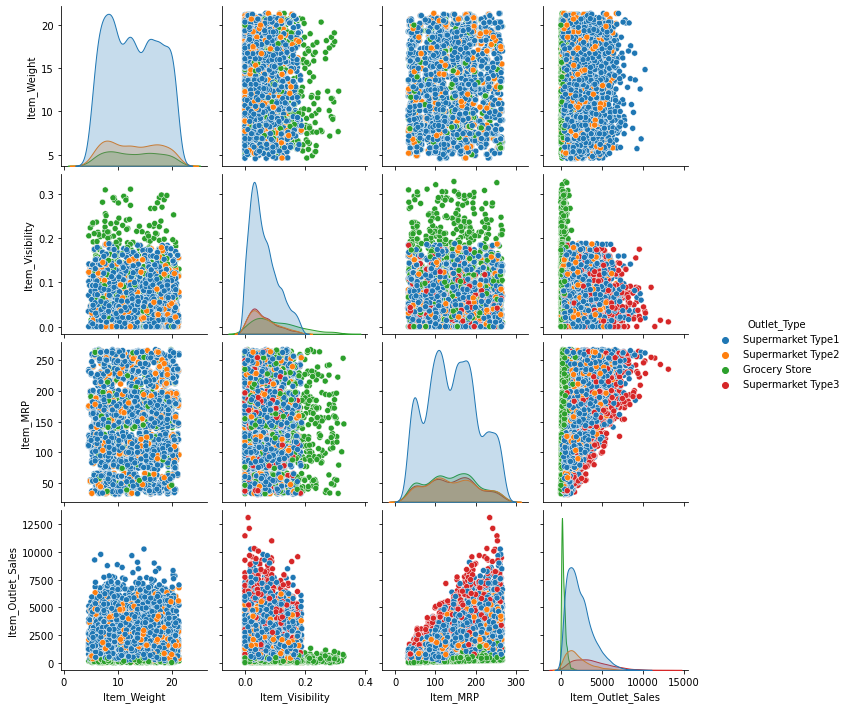

In [33]:
sns.pairplot(train_data.drop(columns ='Outlet_Establishment_Year'),hue='Outlet_Type')
plt.show()

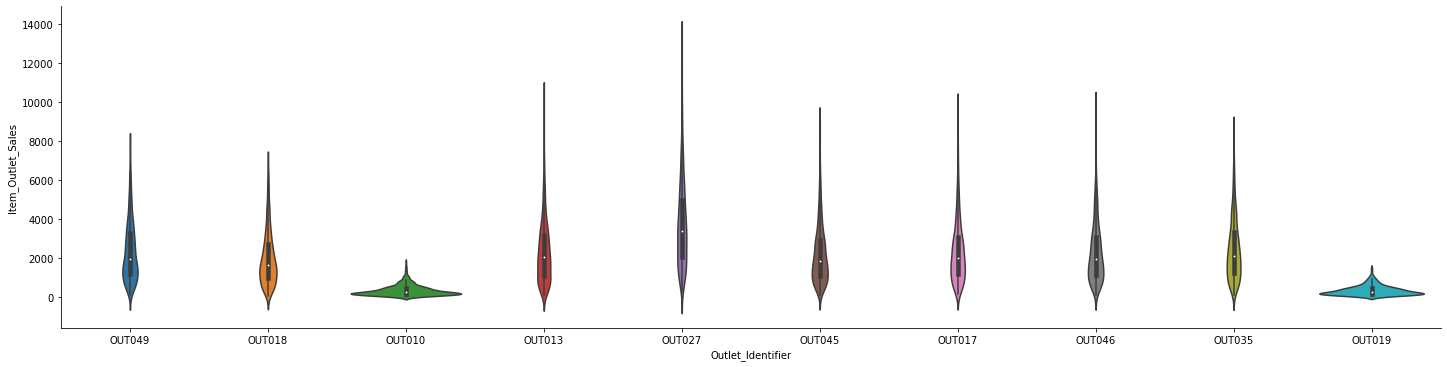

In [34]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train_data,aspect = 4)

# Observations
Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content. 

The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

# Missing Data Treatment

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

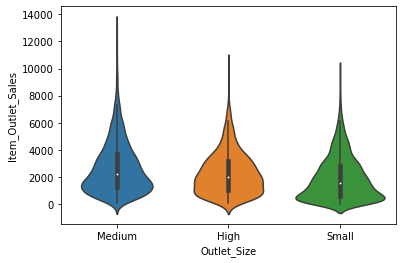

In [35]:
sns.violinplot('Outlet_Size','Item_Outlet_Sales',data = train_data)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

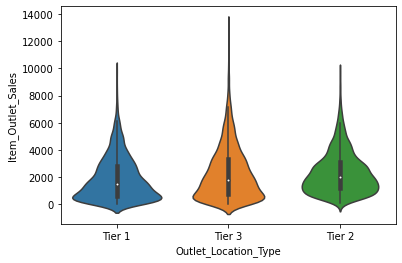

In [36]:
sns.violinplot('Outlet_Location_Type','Item_Outlet_Sales',data = train_data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

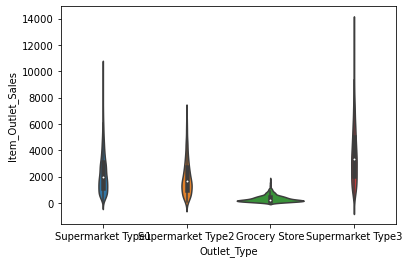

In [37]:
sns.violinplot('Outlet_Type','Item_Outlet_Sales',data = train_data)

In [38]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

label_enc  = LabelEncoder()
l = label_enc.fit_transform(train_data['Item_Identifier'])
l

array([ 156,    8,  662, ..., 1357,  681,   50])

In [40]:
train_data['Item_Weight'].fillna(l.mean(),inplace = True)

In [41]:
train_data.Item_Weight.isna().sum()

0

In [42]:
train_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [43]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode(),inplace  = True)

In [44]:
train_data['Outlet_Size'].isna().sum()

2410

In [45]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,144.491125,0.066132,140.992782,1997.831867,2181.288914
std,289.213393,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,14.500000,0.053931,143.012800,1999.000000,1794.331000
75%,19.500000,0.094585,185.643700,2004.000000,3101.296400
max,779.714889,0.328391,266.888400,2009.000000,13086.964800


In [46]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [47]:
missing =train_data[train_data['Item_Visibility'] ==0]

In [48]:
missing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,779.714889,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,train
8484,DRJ49,6.865000,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736,train
8486,FDR20,20.000000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744,train
8494,NCI54,15.200000,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680,train


<AxesSubplot:ylabel='Frequency'>

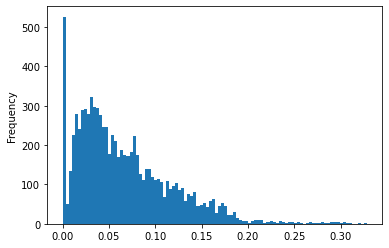

In [49]:
train_data['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [50]:
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0.00,train_data['Item_Visibility'].mean())

<AxesSubplot:ylabel='Frequency'>

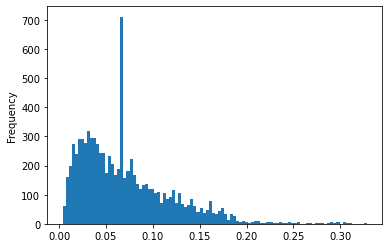

In [51]:
train_data['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [52]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]

non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [53]:
item_list =[] 
for i in train_data['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train_data['Item_Type_new'] = item_list

In [54]:
train_data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW26     9
FDU12     9
NCI54     9
         ..
FDQ60     1
FDK57     1
FDO33     1
FDY43     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [55]:
train_data['Item_Category'] =train_data['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [56]:
Food=pd.crosstab(train_data['Item_Type'],train_data['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


In [57]:
train_data['Item_Fat_Content'][(train_data['Item_Category']=='NC')]='Non Edible'

In [58]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [59]:
train_data['Outlet_Years'] = 2019-train_data['Outlet_Establishment_Year']

In [60]:
train_data['Price_Per_Unit_Weight'] = train_data['Item_MRP']/train_data['Item_Weight']

In [61]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train_data['Item_MRP_Clusters'] = train_data['Item_MRP'].astype('int').apply(clusters)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [62]:
train_data['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

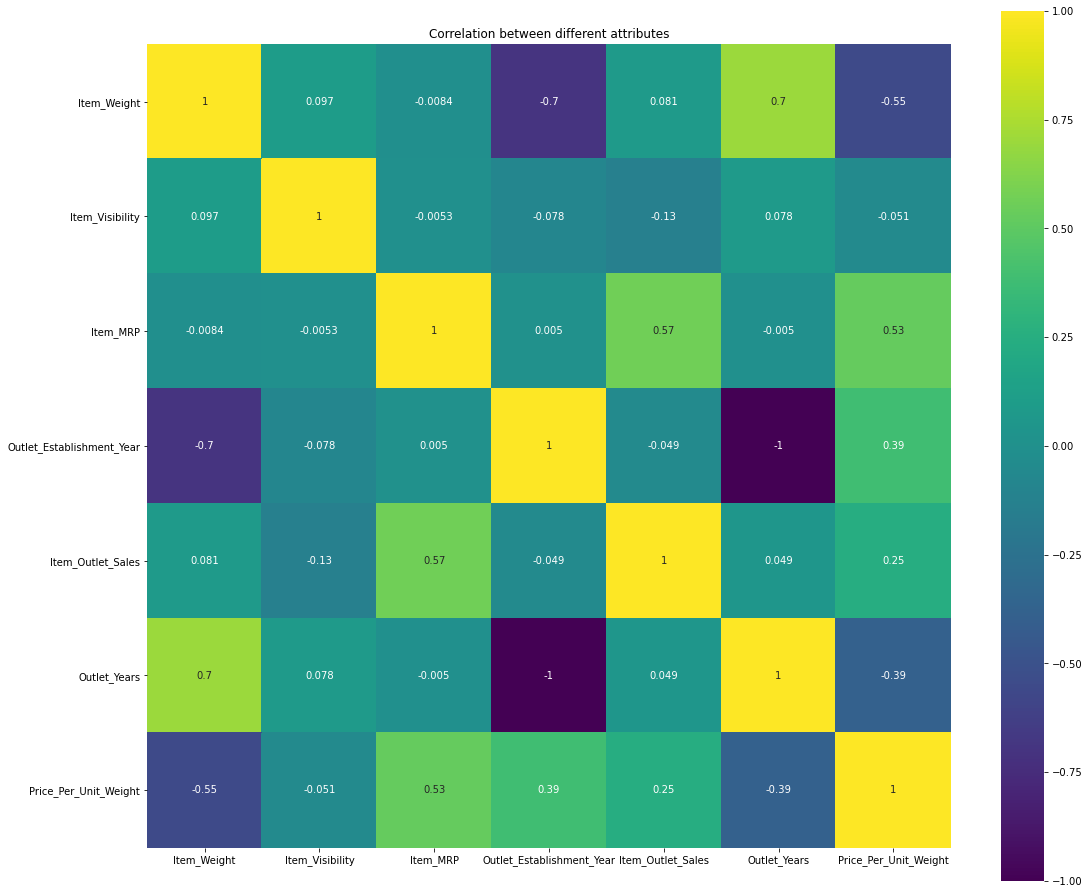

In [63]:
plt.figure(figsize=(18,16))
sns.heatmap(train_data.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

# Encoding Categorical Variables

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

train_data['Outlet_Size']= le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_MRP_Clusters'] = le.fit_transform(train_data['Item_MRP_Clusters'])

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_new              8523 non-null   objec

In [67]:
e = pd.get_dummies(train_data[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new',
                               'Item_Category']])
train_data = train_data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new',
                              'Item_Category','source'],axis = 1 )

train_data = pd.concat([train_data,e],axis = 1)

<AxesSubplot:ylabel='Frequency'>

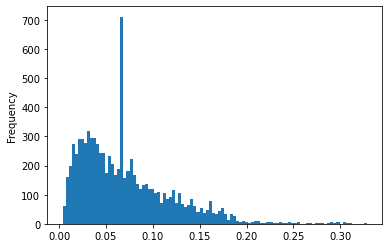

In [68]:
train_data['Item_Visibility'].plot(kind = 'hist',bins = 100)

<AxesSubplot:ylabel='Frequency'>

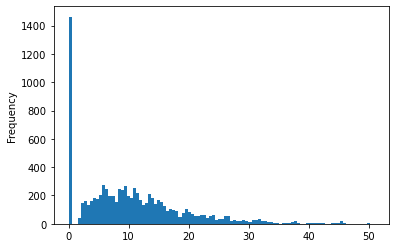

In [69]:
train_data['Price_Per_Unit_Weight'].plot(kind = 'hist',bins = 100)

In [70]:
train_data['Price_Per_Unit_Weight'] = np.log(train_data['Price_Per_Unit_Weight'])

train_data['Item_Visibility'] = np.log(train_data['Item_Visibility'])

In [71]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.300,0,-4.132215,249.8092,1999,1,0,3735.1380,20,3.290683,...,0,1,0,0,0,0,1,0,1,0
1,5.920,2,-3.948780,48.2692,2009,1,2,443.4228,10,2.098457,...,0,0,1,0,1,0,0,1,0,0
2,17.500,0,-4.088756,141.6180,1999,1,0,2097.2700,20,2.090932,...,0,1,0,0,0,0,1,0,1,0
3,19.200,2,-2.716102,182.0950,1998,3,2,732.3800,21,2.249618,...,1,0,0,0,0,0,1,0,1,0
4,8.930,1,-2.716102,53.8614,1987,0,2,994.7052,32,1.796998,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,-2.868511,214.5218,1987,0,2,2778.3834,32,3.441975,...,0,1,0,0,0,1,0,0,1,0
8519,8.380,2,-3.057982,108.1570,2002,3,1,549.2850,17,2.557736,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,1,-3.347099,85.1224,2004,2,1,1193.1136,15,2.083236,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,2,-1.929501,103.1332,2009,1,2,1845.5976,10,2.660552,...,0,0,1,0,0,1,0,0,1,0


In [72]:
X = train_data.drop(columns = 'Item_Outlet_Sales')
Y = train_data['Item_Outlet_Sales']

In [73]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20, random_state=2)
y_train.head()

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
Name: Item_Outlet_Sales, dtype: float64

In [74]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 1605) (1705, 1605) (6818,) (1705,)


# Model Building

### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

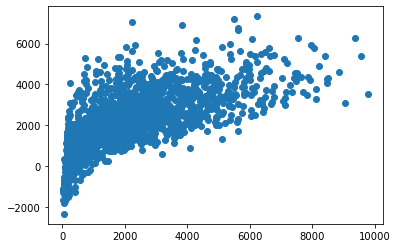

In [77]:
plt.scatter(y_test,y_pred_lr)
plt.show()

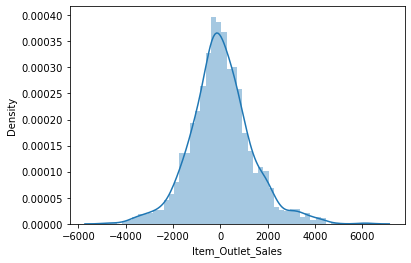

In [78]:
sns.distplot((y_test-y_pred_lr),bins=50)
plt.show()

In [79]:
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.6638270999752598, 0.4349771689429155)

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [81]:
print('mean_squared_error: ', mean_squared_error(y_test,y_pred_lr))
print('mean_absolute_error: ', mean_absolute_error(y_test,y_pred_lr))
print("RSME: ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

mean_squared_error:  1744267.6925916572
mean_absolute_error:  984.0263451612905
RSME:  1320.707269833727


# LASSO REGRSSOR

In [82]:
from sklearn.linear_model import Lasso

In [83]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train,y_train)

y_pred_ls = ls.predict(x_test)

print('mean_squared_error: ', mean_squared_error(y_test,y_pred_ls))
print('mean_absolute_error: ', mean_absolute_error(y_test,y_pred_ls))
print("RSME",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

mean_squared_error:  1724299.5958266614
mean_absolute_error:  977.1605468923613
RSME 1313.1258872730602


In [84]:
ls.score(x_train,y_train), ls.score(x_test,y_test)

(0.6636779573389231, 0.44144545968343607)

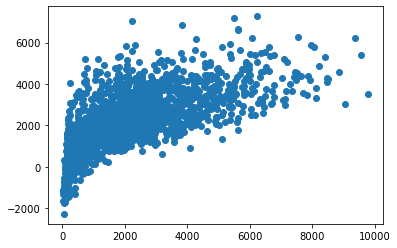

In [85]:
plt.scatter(y_test,y_pred_ls)
plt.show()

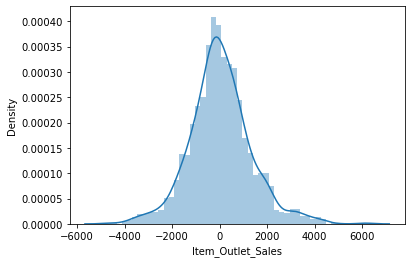

In [86]:
sns.distplot((y_test-y_pred_ls),bins=50)
plt.show()

### Fitting the data to various model and checking the accuracy

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()

model=[lr,dt,rf,ab]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    print('Accuracy of', m )
    print('Training Score', train_score)
    print('Testing Score', test_score)
    print('\n')

Accuracy of LinearRegression()
Training Score 0.6638270999752598
Testing Score 0.4349771689429155


Accuracy of DecisionTreeRegressor()
Training Score 1.0
Testing Score 0.2728161355698562


Accuracy of RandomForestRegressor()
Training Score 0.9374366981021346
Testing Score 0.5488137004899556


Accuracy of AdaBoostRegressor()
Training Score 0.46791167143525325
Testing Score 0.46746039208751566




In [88]:
from sklearn.model_selection import cross_val_score

model=(lr,dt,rf,ab)
for m in model:
    score=cross_val_score(m,X,Y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
-7104518780353234.0


Mean Accuracy of DecisionTreeRegressor()
0.24420213349020542


Mean Accuracy of RandomForestRegressor()
0.5464936174101476


Mean Accuracy of AdaBoostRegressor()
0.4372757147585656




In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [90]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
y_pred_ls=ls.predict(x_test)
lss=r2_score(y_test,y_pred_ls)
lss

0.5443855562446261

In [91]:
cv_score=cross_val_score(ls,X,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.55823619961018

In [92]:
Finalmod=LinearRegression(copy_X=True, fit_intercept= True, n_jobs=None, normalize=False)
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 43.49771689429155


NameError: name 'x' is not defined

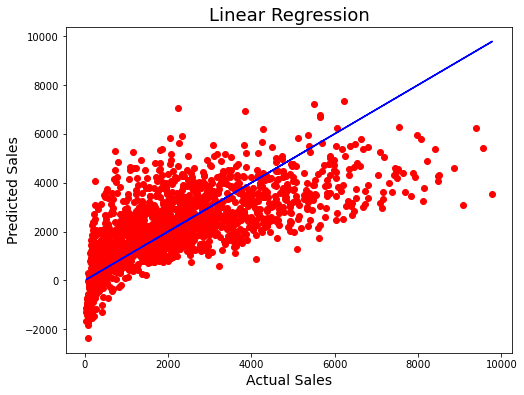

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [94]:
import joblib
joblib.dump(Finalmod,'BigDataMart_sales.obj')

['BigDataMart_sales.obj']

In [95]:
load_model=joblib.load('BigDataMart_sales.obj')

In [100]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
